In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
iris = datasets.load_iris()

In [9]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [10]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [11]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [12]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

Text(0, 0.5, 'Sepal Width')

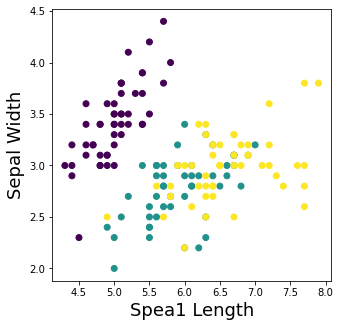

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

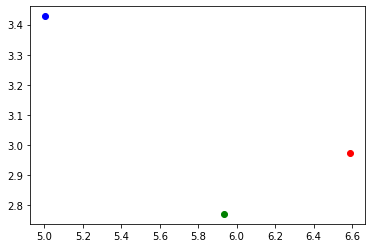

In [16]:
colmap = {0: 'b', 1: 'g', 2: 'r'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

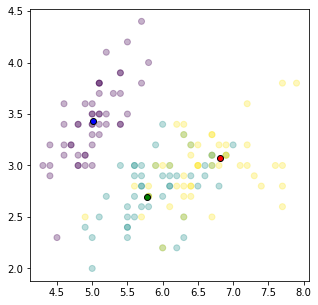

In [28]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'b', 1: 'g', 2: 'r'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [29]:
  def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [30]:
df = assignment(df, centroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.051594,1.764836,0,b
1,4.9,3.0,0,0.440931,0.926140,1.914215,0,b
2,4.7,3.2,0,0.381602,1.187514,2.116492,0,b
3,4.6,3.1,0,0.521939,1.242335,2.212913,0,b
4,5.0,3.6,0,0.172105,1.192508,1.887407,0,b
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.976130,0.135136,2,r
146,6.3,2.5,2,1.592363,0.560492,0.770028,1,g
147,6.5,3.0,2,1.554098,0.788837,0.321509,2,r
148,6.2,3.4,2,1.194328,0.826107,0.693868,2,r


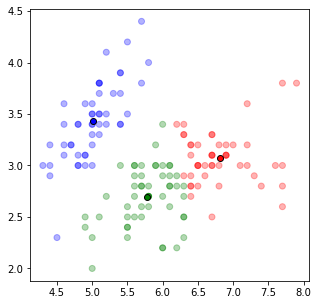

In [31]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [32]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [33]:
centroids = update(centroids)
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.773584905660377, 2.692452830188679],
 2: [6.812765957446806, 3.0744680851063824]}

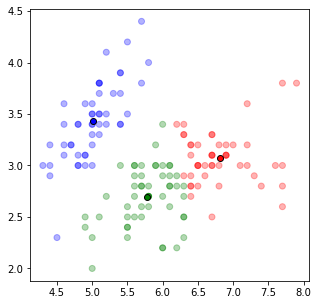

In [34]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [35]:
df = assignment(df, centroids)

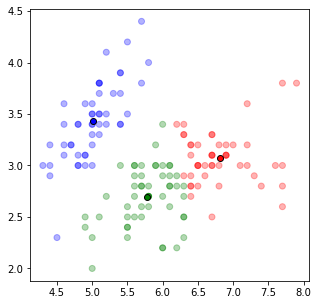

In [36]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

In [37]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

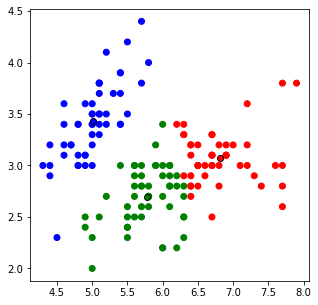

In [38]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()